Global Analysis of Tuberculosis Epidermic using Python


Tuberculosis (TB) is caused by bacteria (Mycobacterium tuberculosis) that most often affect the lungs and is spread from person to person through the air. Tuberculosis is curable and preventable.

The aim of this project is to provide an in-depth analysis of this data and to answer the following questions:

Estimated Tuberculosis cases per year
Estimated Number of people living with Tuberculosis and HIV
Estimated number of Tuberculosis incidents per year
Estimated number of death from Tuberculosis per year
The Top 10 Countries with Tuberculosis Incident.
The Top 10 Countries with Tuberculosis deaths.

1.) Import Libraries  

Import Libraries, Dataset and the data dictonary so as to fully understand the data i am working with

In [15]:
#import Libries 
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# import dataset as pandas dataframe
tb = pd.read_csv("./TB_burden_countries_2023-04-06.csv")

# preview first 10 rows of dataset
tb.head(10)

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,cfr,cfr_lo,cfr_hi,cfr_pct,cfr_pct_lo,cfr_pct_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,19542982,190.0,122.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,36.0,19.0,13.0,30.0
1,Afghanistan,AF,AFG,4,EMR,2001,19688632,189.0,122.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,51.0,27.0,19.0,42.0
2,Afghanistan,AF,AFG,4,EMR,2002,21000256,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,35.0,24.0,54.0
3,Afghanistan,AF,AFG,4,EMR,2003,22645130,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61.0,32.0,23.0,50.0
4,Afghanistan,AF,AFG,4,EMR,2004,23553551,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,78.0,41.0,29.0,64.0
5,Afghanistan,AF,AFG,4,EMR,2005,24411191,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,89.0,47.0,33.0,73.0
6,Afghanistan,AF,AFG,4,EMR,2006,25442944,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,53.0,37.0,82.0
7,Afghanistan,AF,AFG,4,EMR,2007,25903301,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,111.0,59.0,41.0,91.0
8,Afghanistan,AF,AFG,4,EMR,2008,26427199,189.0,122.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,107.0,57.0,40.0,88.0
9,Afghanistan,AF,AFG,4,EMR,2009,27385307,189.0,122.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,50.0,35.0,78.0


In [20]:
# preview the shape of the data
tb.shape

(4702, 50)

In [21]:
# preview the summary of the data
tb.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   4702 non-null   object 
 1   iso2                      4680 non-null   object 
 2   iso3                      4702 non-null   object 
 3   iso_numeric               4702 non-null   int64  
 4   g_whoregion               4702 non-null   object 
 5   year                      4702 non-null   int64  
 6   e_pop_num                 4702 non-null   int64  
 7   e_inc_100k                4702 non-null   float64
 8   e_inc_100k_lo             4702 non-null   float64
 9   e_inc_100k_hi             4702 non-null   float64
 10  e_inc_num                 4702 non-null   int64  
 11  e_inc_num_lo              4702 non-null   int64  
 12  e_inc_num_hi              4702 non-null   int64  
 13  e_tbhiv_prct              4057 non-null   float64
 14  e_tbhiv_

In [25]:
#I imported the data dictonary to be able to understand the field properly. 

tb_dic = pd.read_csv("./TB_data_dictionary_2023-04-06.csv")

#preview the top 15 rows of the data 

tb_dic.head(15)

,variable_name,dataset,code_list,definition
0,country,Country identification,NaN,Country or territory name
1,g_whoregion,Country identification,AFR=Africa; AMR=Americas; EMR=Eastern Mediterr...,WHO region
2,iso_numeric,Country identification,NaN,ISO numeric country/territory code
3,iso2,Country identification,NaN,ISO 2-character country/territory code
4,iso3,Country identification,NaN,ISO 3-character country/territory code
5,c_cdr,Estimates,NaN,Case detection rate (all forms) [also known as...
6,c_cdr_hi,Estimates,NaN,Case detection rate (all forms) [also known as...
7,c_cdr_lo,Estimates,NaN,Case detection rate (all forms) [also known as...
8,c_newinc_100k,Estimates,NaN,"Case notification rate, which is the total of ..."
9,cfr,Estimates,NaN,Estimated TB case fatality ratio


2.) Data Cleaning


I removed unwanted columns, duplicate values and manipulated the dataset

In [26]:
# Check for null values 

tb.isnull()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,cfr,cfr_lo,cfr_hi,cfr_pct,cfr_pct_lo,cfr_pct_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4698,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4699,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4700,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


In [27]:
#rows missing in each column
tb.isnull().sum()

country                        0
iso2                          22
iso3                           0
iso_numeric                    0
g_whoregion                    0
year                           0
e_pop_num                      0
e_inc_100k                     0
e_inc_100k_lo                  0
e_inc_100k_hi                  0
e_inc_num                      0
e_inc_num_lo                   0
e_inc_num_hi                   0
e_tbhiv_prct                 645
e_tbhiv_prct_lo              645
e_tbhiv_prct_hi              645
e_inc_tbhiv_100k             645
e_inc_tbhiv_100k_lo          645
e_inc_tbhiv_100k_hi          645
e_inc_tbhiv_num              645
e_inc_tbhiv_num_lo           645
e_inc_tbhiv_num_hi           645
e_mort_exc_tbhiv_100k         22
e_mort_exc_tbhiv_100k_lo      22
e_mort_exc_tbhiv_100k_hi      22
e_mort_exc_tbhiv_num          22
e_mort_exc_tbhiv_num_lo       22
e_mort_exc_tbhiv_num_hi       22
e_mort_tbhiv_100k             22
e_mort_tbhiv_100k_lo          22
e_mort_tbh

In [28]:
tb.columns

Index(['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year',
       'e_pop_num', 'e_inc_100k', 'e_inc_100k_lo', 'e_inc_100k_hi',
       'e_inc_num', 'e_inc_num_lo', 'e_inc_num_hi', 'e_tbhiv_prct',
       'e_tbhiv_prct_lo', 'e_tbhiv_prct_hi', 'e_inc_tbhiv_100k',
       'e_inc_tbhiv_100k_lo', 'e_inc_tbhiv_100k_hi', 'e_inc_tbhiv_num',
       'e_inc_tbhiv_num_lo', 'e_inc_tbhiv_num_hi', 'e_mort_exc_tbhiv_100k',
       'e_mort_exc_tbhiv_100k_lo', 'e_mort_exc_tbhiv_100k_hi',
       'e_mort_exc_tbhiv_num', 'e_mort_exc_tbhiv_num_lo',
       'e_mort_exc_tbhiv_num_hi', 'e_mort_tbhiv_100k', 'e_mort_tbhiv_100k_lo',
       'e_mort_tbhiv_100k_hi', 'e_mort_tbhiv_num', 'e_mort_tbhiv_num_lo',
       'e_mort_tbhiv_num_hi', 'e_mort_100k', 'e_mort_100k_lo',
       'e_mort_100k_hi', 'e_mort_num', 'e_mort_num_lo', 'e_mort_num_hi', 'cfr',
       'cfr_lo', 'cfr_hi', 'cfr_pct', 'cfr_pct_lo', 'cfr_pct_hi',
       'c_newinc_100k', 'c_cdr', 'c_cdr_lo', 'c_cdr_hi'],
      dtype='object')

In [29]:
#Drop columns that are not needed
tb_new = tb.drop(["iso2","iso_numeric","e_inc_100k_lo","e_inc_100k_hi","e_inc_num_lo","e_inc_num_hi","e_tbhiv_prct_lo","e_tbhiv_prct_hi","e_inc_tbhiv_100k_lo","e_inc_tbhiv_100k_hi","e_inc_tbhiv_num_lo","e_inc_tbhiv_num_hi","e_mort_exc_tbhiv_100k_lo","e_mort_exc_tbhiv_100k_hi","e_mort_exc_tbhiv_num_lo","e_mort_exc_tbhiv_num_hi","e_mort_tbhiv_100k_lo","e_mort_tbhiv_100k_hi","e_mort_tbhiv_num_lo","e_mort_tbhiv_num_hi","e_mort_100k_lo","e_mort_100k_hi","e_mort_num_lo","e_mort_num_hi","cfr","cfr_lo","cfr_hi","cfr_pct_lo","cfr_pct_hi","cfr_pct",
"c_cdr_lo","c_cdr_hi"], axis= 1)
display(tb_new)

,country,iso3,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_num,e_tbhiv_prct,e_inc_tbhiv_100k,e_inc_tbhiv_num,e_mort_exc_tbhiv_100k,e_mort_exc_tbhiv_num,e_mort_tbhiv_100k,e_mort_tbhiv_num,e_mort_100k,e_mort_num,c_newinc_100k,c_cdr
0,Afghanistan,AFG,EMR,2000,19542982,190.0,37000,0.02,0.03,6.0,68.0,13000.0,0.17,33.0,68.0,13000.0,36.0,19.0
1,Afghanistan,AFG,EMR,2001,19688632,189.0,37000,0.01,0.03,6.0,63.0,12000.0,0.30,60.0,63.0,12000.0,51.0,27.0
2,Afghanistan,AFG,EMR,2002,21000256,189.0,40000,0.01,0.03,6.0,57.0,12000.0,0.27,57.0,57.0,12000.0,66.0,35.0
3,Afghanistan,AFG,EMR,2003,22645130,189.0,43000,0.01,0.03,6.0,58.0,13000.0,0.29,66.0,58.0,13000.0,61.0,32.0
4,Afghanistan,AFG,EMR,2004,23553551,189.0,44000,0.01,0.03,6.0,51.0,12000.0,0.29,67.0,52.0,12000.0,78.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,Zimbabwe,ZWE,AFR,2017,14751101,221.0,33000,63.00,140.00,21000.0,8.3,1200.0,27.00,4000.0,35.0,5200.0,175.0,79.0
4698,Zimbabwe,ZWE,AFR,2018,15052184,210.0,32000,62.00,130.00,20000.0,7.7,1200.0,24.00,3600.0,32.0,4800.0,167.0,80.0
4699,Zimbabwe,ZWE,AFR,2019,15354608,199.0,31000,60.00,119.00,18000.0,11.0,1700.0,31.00,4800.0,43.0,6600.0,137.0,69.0
4700,Zimbabwe,ZWE,AFR,2020,15669666,181.0,28000,61.00,108.00,17000.0,12.0,1800.0,30.00,4700.0,42.0,6600.0,100.0,55.0


In [30]:
tb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                4702 non-null   object 
 1   iso3                   4702 non-null   object 
 2   g_whoregion            4702 non-null   object 
 3   year                   4702 non-null   int64  
 4   e_pop_num              4702 non-null   int64  
 5   e_inc_100k             4702 non-null   float64
 6   e_inc_num              4702 non-null   int64  
 7   e_tbhiv_prct           4057 non-null   float64
 8   e_inc_tbhiv_100k       4057 non-null   float64
 9   e_inc_tbhiv_num        4057 non-null   float64
 10  e_mort_exc_tbhiv_100k  4680 non-null   float64
 11  e_mort_exc_tbhiv_num   4680 non-null   float64
 12  e_mort_tbhiv_100k      4680 non-null   float64
 13  e_mort_tbhiv_num       4680 non-null   float64
 14  e_mort_100k            4680 non-null   float64
 15  e_mo

In [31]:
tb_new.isnull().sum()

country                    0
iso3                       0
g_whoregion                0
year                       0
e_pop_num                  0
e_inc_100k                 0
e_inc_num                  0
e_tbhiv_prct             645
e_inc_tbhiv_100k         645
e_inc_tbhiv_num          645
e_mort_exc_tbhiv_100k     22
e_mort_exc_tbhiv_num      22
e_mort_tbhiv_100k         22
e_mort_tbhiv_num          22
e_mort_100k               22
e_mort_num                22
c_newinc_100k            173
c_cdr                    278
dtype: int64

In [32]:
tb_data = tb_new.fillna(0)

display(tb_data)

,country,iso3,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_num,e_tbhiv_prct,e_inc_tbhiv_100k,e_inc_tbhiv_num,e_mort_exc_tbhiv_100k,e_mort_exc_tbhiv_num,e_mort_tbhiv_100k,e_mort_tbhiv_num,e_mort_100k,e_mort_num,c_newinc_100k,c_cdr
0,Afghanistan,AFG,EMR,2000,19542982,190.0,37000,0.02,0.03,6.0,68.0,13000.0,0.17,33.0,68.0,13000.0,36.0,19.0
1,Afghanistan,AFG,EMR,2001,19688632,189.0,37000,0.01,0.03,6.0,63.0,12000.0,0.30,60.0,63.0,12000.0,51.0,27.0
2,Afghanistan,AFG,EMR,2002,21000256,189.0,40000,0.01,0.03,6.0,57.0,12000.0,0.27,57.0,57.0,12000.0,66.0,35.0
3,Afghanistan,AFG,EMR,2003,22645130,189.0,43000,0.01,0.03,6.0,58.0,13000.0,0.29,66.0,58.0,13000.0,61.0,32.0
4,Afghanistan,AFG,EMR,2004,23553551,189.0,44000,0.01,0.03,6.0,51.0,12000.0,0.29,67.0,52.0,12000.0,78.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,Zimbabwe,ZWE,AFR,2017,14751101,221.0,33000,63.00,140.00,21000.0,8.3,1200.0,27.00,4000.0,35.0,5200.0,175.0,79.0
4698,Zimbabwe,ZWE,AFR,2018,15052184,210.0,32000,62.00,130.00,20000.0,7.7,1200.0,24.00,3600.0,32.0,4800.0,167.0,80.0
4699,Zimbabwe,ZWE,AFR,2019,15354608,199.0,31000,60.00,119.00,18000.0,11.0,1700.0,31.00,4800.0,43.0,6600.0,137.0,69.0
4700,Zimbabwe,ZWE,AFR,2020,15669666,181.0,28000,61.00,108.00,17000.0,12.0,1800.0,30.00,4700.0,42.0,6600.0,100.0,55.0


3.) Exploratory Data Analysis

In [33]:
# Get descriptive statistics summary 

tb_data.describe(include = "all")

,country,iso3,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_num,e_tbhiv_prct,e_inc_tbhiv_100k,e_inc_tbhiv_num,e_mort_exc_tbhiv_100k,e_mort_exc_tbhiv_num,e_mort_tbhiv_100k,e_mort_tbhiv_num,e_mort_100k,e_mort_num,c_newinc_100k,c_cdr
count,4702,4702,4702,4702.00000,4.702000e+03,4702.000000,4.702000e+03,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000
unique,217,217,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,22,22,1183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2010.53892,3.277924e+07,124.495904,5.266572e+04,10.623392,31.853456,6278.367929,14.748896,6765.165674,11.441948,2211.541046,26.200806,8982.283071,71.166742,68.893003
std,NaN,NaN,NaN,6.33931,1.301093e+08,186.966585,2.643730e+05,16.461475,111.028057,30201.044171,22.613711,37716.619797,40.087637,10508.155339,54.734626,43308.434123,104.186133,25.608232
min,NaN,NaN,NaN,2000.00000,1.343000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2005.00000,7.488340e+05,12.000000,2.100000e+02,0.260000,0.070000,2.000000,0.880000,16.000000,0.010000,0.000000,0.980000,18.000000,8.600000,57.000000
50%,NaN,NaN,NaN,2011.00000,5.830724e+06,46.000000,3.000000e+03,3.450000,1.000000,73.000000,4.100000,220.000000,0.190000,16.000000,4.600000,270.000000,34.000000,80.000000
75%,NaN,NaN,NaN,2016.00000,2.102880e+07,164.000000,1.700000e+04,13.000000,8.700000,1200.000000,19.000000,1700.000000,2.200000,330.000000,24.000000,2800.000000,92.000000,87.000000


3a.) How many countries are in this data?

In [34]:
tb_analysis = tb_data[["country"]].nunique()
tb_analysis

country    217
dtype: int64

In [35]:
#The countries are divided into the number of WHO regions. 

tb_analysis = tb_data[["g_whoregion"]].nunique()
tb_analysis

g_whoregion    6
dtype: int64

3b.) How many years does this data span across?

In [36]:
tb_analysis = tb_data[["year"]].nunique()
tb_analysis

year    22
dtype: int64

3c.) Display sample data for a country such as Nigeria

In [38]:
# I am going to display a sample date of population, Incidence Number and the corresponding years and would be sorting it according to the year

tb_analysis = tb_data[(tb_data["country"] == "Nigeria")][["country", "year", "e_pop_num", "e_inc_num"]].sort_values(["year"])
tb_analysis


,country,year,e_pop_num,e_inc_num
3053,Nigeria,2000,122851984,269000
3054,Nigeria,2001,126152678,276000
3055,Nigeria,2002,129583026,284000
3056,Nigeria,2003,133119801,292000
3057,Nigeria,2004,136756848,300000
3058,Nigeria,2005,140490722,308000
3059,Nigeria,2006,144329764,316000
3060,Nigeria,2007,148294028,325000
3061,Nigeria,2008,152382506,334000
3062,Nigeria,2009,156595758,343000


3d.) What is the Population, Number of cases(TB alone and TB with HIV) and Number of deaths as at the year 2021

According to the data dictionary;

1.) e_pop_num: Estimated total population number

2.) e_inc_num: Estimated number of incident cases (all forms)

3.) e_inc_tbhiv: Estimated incidence of TB cases who are HIV-positive

4.) e_mort_num: Estimated mortality of TB cases (all forms)

5.) e_mort_tbhiv_num: Estimated number of deaths from TB in people who are HIV-positive

6.) e_tbhiv_prct: Estimated HIV in incident TB (percent)

In [39]:
tb_analysis = tb_data[(tb_data["year"] == 2021)][["e_pop_num","e_inc_num","e_inc_tbhiv_num","e_mort_num","e_mort_tbhiv_num","e_tbhiv_prct"]].sum()
print(tb_analysis.astype(int))

e_pop_num          -2147483648
e_inc_num             10561049
e_inc_tbhiv_num         701508
e_mort_num             1544019
e_mort_tbhiv_num        185721
e_tbhiv_prct              1704
dtype: int32


3e. i) What is the total number of Estimated Incidences of Tuberculosis since the year 2000?

In [40]:
#The sum total of e_inc_number since 2000 till 2021

tb_analysis = tb_data[(tb_data["year"] >= 2000)][["e_inc_num"]].sum()
tb_analysis

e_inc_num    247634223
dtype: int64

3e. ii) What is the total number of Estimated incidences of Tuberculosis in HIV Positive Patients since the year 2000?

In [41]:
#The sum total of e_inc_tbhiv_num since 2000 till 2021

tb_analysis = tb_data[(tb_data["year"] >= 2000)][["e_inc_tbhiv_num"]].sum()
tb_analysis

e_inc_tbhiv_num    29520886.0
dtype: float64

3e. iii) What is the total number of Estimated Deaths from Tuberculosis from the year 2000 till date?

In [42]:
#The sum total of e_mort_num since 2000 till 2021

tb_analysis = tb_data[(tb_data["year"] >= 2000)][["e_mort_num"]].sum()
tb_analysis

e_mort_num    42234695.0
dtype: float64

3e. iv.) What is the total number of Estimated Deaths from Tuberculosis in People who are HIV positive since the year 2000?

In [43]:
#The sum total of e_mort_tbhiv_num since 2000 till 2021

tb_analysis = tb_data[(tb_data["year"] >= 2000)][["e_mort_tbhiv_num"]].sum()
tb_analysis

e_mort_tbhiv_num    10398666.0
dtype: float64

3f. i.) What is the number of Estimated incidence of Tuberculosis from year 2000 to 2021

In [44]:
tb_analysis1 = tb_data.groupby(["year"])[["e_inc_num"]].sum()
tb_analysis1_sort = pd.DataFrame(tb_analysis1.sort_values('e_inc_num', ascending = False))
tb_analysis1_sort

,e_inc_num
year,
2006,11820137
2005,11818293
2007,11779003
2004,11763157
2008,11730656
2009,11697437
2003,11688601
2010,11577028
2002,11542345


3f. ii.) A line Chart showing the plot of Tuberculosis Incidence across 22 years

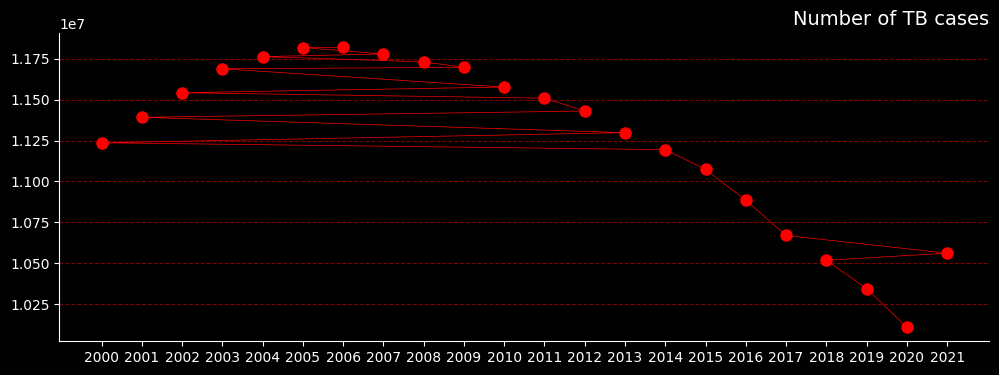

In [47]:
# figure
fig, ax = plt.subplots(1, figsize=(12,4), facecolor='#000000')
ax.set_facecolor('#000000')
# data
TB_cases = tb_analysis1_sort['e_inc_num']
# plot
plt.plot(tb_analysis1_sort.index, TB_cases, marker='o', markersize=8, color='#FF0000', linewidth=0.5)
# ticks n title
ax.tick_params(axis='both', colors='w')
plt.xticks(tb_analysis1_sort.index[::1])
plt.title('Number of TB cases', loc='right', color='w', fontsize=14)
# spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('w')
ax.spines['bottom'].set_color('w')
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FF0000', linestyle='dashed', alpha=0.5)
plt.show()

3g. i.) what is the estimated number of deaths from Tuberculosis for the years 2000 to 2021?

In [48]:
tb_analysis2 = tb_data.groupby(["year"])[["e_mort_num"]].sum()
tb_analysis2_sort = pd.DataFrame(tb_analysis2.sort_values('e_mort_num', ascending = False))
tb_analysis2_sort

,e_mort_num
year,
2000,2390424.0
2001,2362987.0
2002,2320594.0
2003,2287647.0
2005,2238531.0
2004,2221253.0
2006,2200045.0
2007,2165951.0
2008,2099399.0


3g. ii.) A line Chart showing the estimated number of deaths from Tuberculosis across 22 years

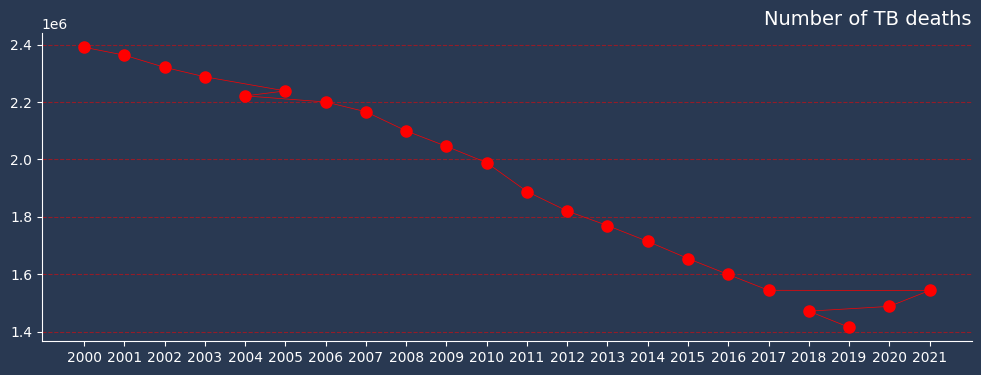

In [50]:
# figure
fig, ax = plt.subplots(1, figsize=(12,4), facecolor='#293952')
ax.set_facecolor('#293952')
# data
TB_deaths = tb_analysis2_sort['e_mort_num']
# plot
plt.plot(tb_analysis2_sort.index, TB_deaths, marker='o', markersize=8, color='#FF0000', linewidth=0.5)
# ticks n title
ax.tick_params(axis='both', colors='w')
plt.xticks(tb_analysis1_sort.index[::1])
plt.title('Number of TB deaths', loc='right', color='w', fontsize=14)
# spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('w')
ax.spines['bottom'].set_color('w')
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FF0000', linestyle='dashed', alpha=0.5)
plt.show()

3h.) What Countries had the highest incidence of Tuberculosis?

I am going to show the Top 10 Countries with the highest estimated incidence of tuberculosis.

In [51]:
tb_analysis_by_country = tb_data.groupby(["country"])[["country", "e_inc_num",]].sum()
tb_analysis_by_country = pd.DataFrame(tb_analysis_by_country.sort_values('e_inc_num', ascending = False))
tb_analysis_by_country.head(10)

,country,e_inc_num
country,,
India,IndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaI...,76650000
China,ChinaChinaChinaChinaChinaChinaChinaChinaChinaC...,22929000
Indonesia,IndonesiaIndonesiaIndonesiaIndonesiaIndonesiaI...,18377000
Philippines,PhilippinesPhilippinesPhilippinesPhilippinesPh...,11612000
Pakistan,PakistanPakistanPakistanPakistanPakistanPakist...,11600000
South Africa,South AfricaSouth AfricaSouth AfricaSouth Afri...,11310000
Nigeria,NigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNige...,7954000
Bangladesh,BangladeshBangladeshBangladeshBangladeshBangla...,7290000
Myanmar,MyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyan...,5005000


3i.) Countries with the highest number of deaths from Tuberculosis


i am going to show the Top 10 countries with highest estimated number of deaths from tuberculosis

In [52]:
tb_analysis_by_country_in_mortality = tb_data.groupby(["country"])[["country", "e_inc_tbhiv_num","e_inc_num","e_mort_tbhiv_num","e_mort_num"]].sum()
tb_analysis_by_country_in_mortality = pd.DataFrame(tb_analysis_by_country_in_mortality.sort_values('e_mort_num', ascending = False))
tb_analysis_by_country_in_mortality.head(10)

,country,e_inc_tbhiv_num,e_inc_num,e_mort_tbhiv_num,e_mort_num
country,,,,,
India,IndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaI...,4139000.0,76650000,1101600.0,12410000.0
Nigeria,NigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNige...,1489000.0,7954000,898000.0,3059000.0
South Africa,South AfricaSouth AfricaSouth AfricaSouth Afri...,7526000.0,11310000,2272000.0,2850000.0
Indonesia,IndonesiaIndonesiaIndonesiaIndonesiaIndonesiaI...,395500.0,18377000,102770.0,2523000.0
Bangladesh,BangladeshBangladeshBangladeshBangladeshBangla...,10749.0,7290000,3633.0,1596000.0
United Republic of Tanzania,United Republic of TanzaniaUnited Republic of ...,1584000.0,3851000,819800.0,1447000.0
Kenya,KenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaK...,1761000.0,4129000,794000.0,1370000.0
China,ChinaChinaChinaChinaChinaChinaChinaChinaChinaC...,398000.0,22929000,99200.0,1331000.0
Democratic Republic of the Congo,Democratic Republic of the CongoDemocratic Rep...,819000.0,4950000,348100.0,1220000.0


4.) Data Export

I exported the dataset to create a visualization using Tableau and Figma

In [ ]:
tb_data.to_csv('./tb_data.csv', index=False, header=True)